high Array size 1258
low Array size 1258
open Array size 1258
close Array size 1258
[ 753.929993  752.669983  759.140015 ... 2254.840088 2296.659912
 2297.76001 ]
14296.490114000002
714.8245057000001
14248.790101000004
712.4395050500002
14202.750123000002
710.13750615
14143.930115000001
707.19650575
14134.900085000001
706.7450042500001
14115.990051000002
705.7995025500002
14127.940063000002
706.39700315
14147.370056
707.3685028
14180.470031
709.02350155
14220.119993999999
711.0059997
14257.629943
712.88149715
14299.419982000001
714.9709991000001
14334.119994
716.7059997
14355.030028000003
717.7515014000002
14360.460021000003
718.0230010500002
14364.210021000004
718.2105010500002
14369.310057000002
718.4655028500001
14382.600096000004
719.1300048000002
14388.700071000001
719.43500355
14396.230039000002
719.8115019500001
14398.010069000002
719.9005034500001
14410.700072000001
720.5350036000001
14414.430052
720.7215026
14405.830015999998
720.2915007999999
14389.800047999997
719.4900023999

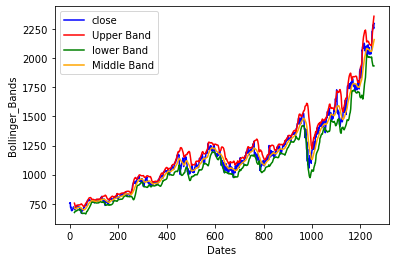

<Figure size 432x288 with 0 Axes>

In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
df = pd.read_csv('../stock_data/GOOG.csv')
array_date = np.array(df['Date'])
array_close = np.array(df['Close'])
array_open = np.array(df['Open'])
array_high = np.array(df['High'])
array_low = np.array(df['Low'])
print("high Array size",array_high.size)
print("low Array size",array_low.size)
print("open Array size",array_open.size)
print("close Array size",array_close.size)
print(array_close)
Bperiods=19
y=0
array_Middleband=[None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]
for x in range(0,array_close.size-Bperiods):
	sum=0
	for j in range(0,Bperiods+1): #upto 20 periods value
		z=array_close[y]
		sum=sum+z
		y=y+1
	print(sum)
	sum=sum/20
	print(sum)
	array_Middleband.append(sum)
	y=y-(Bperiods)
print(len(array_Middleband))
print(array_Middleband)
stndrd_deviation=[None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]
y=0
z=0
for x in range(0,array_close.size-Bperiods):
	sum=0
	for j in range(0,Bperiods+1): #upto 20 periods value
		z=array_Middleband[x+Bperiods]
		sum=sum+((z-array_close[y])*(z-array_close[y]))
		y=y+1
	print(sum)
	sum=sum/19
	sum=math.sqrt(sum)
	print(sum)
	stndrd_deviation.append(sum)
	y=y-(Bperiods)
print(len(stndrd_deviation))
print(stndrd_deviation)
upper_band=[None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]
lower_band=[None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]
for x in range(Bperiods,len(stndrd_deviation)-1):
	upper_band.append(array_Middleband[x]+(2*stndrd_deviation[x]))
	lower_band.append(array_Middleband[x]-(2*stndrd_deviation[x]))
print(upper_band)
print(len(upper_band))
print(lower_band)
plt.plot(array_close,color='blue',label = 'close')
plt.plot(upper_band,color='red',label = 'Upper Band')
plt.plot(lower_band,color='green',label = 'lower Band')
plt.plot(array_Middleband,color='orange',label = 'Middle Band')
df['Date'] = df['Date'].reset_index()
x=df['Date'].index
labels = array_date[0:]
#plt.xticks(x, labels, rotation = 'vertical')
plt.ylabel('Bollinger_Bands')
plt.xlabel('Dates')
plt.legend()
plt.figure()
plt.show()
